In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#1
x=np.array([0.84,0.92,1.0,1.08,1.16])
fx=np.array([0.431711,0.398519,0.367879,0.339596,0.313486])

In [4]:
#1.a
h=x[1]-x[0]
#first noncentral finite difference approx
#(f(x+2h)-2*f(x+h)+f(x))/(h**2)
print('f``(0.84)=',(fx[2]-2*fx[1]+fx[0])/(h**2))
#first central finite difference approx
#f(x+h)-2f(x)+f(x-h)/(h**2)
print('f``(1)=',(fx[3]-2*fx[2]+fx[1])/(h**2))

f``(0.84)= 0.3987499999999991
f``(1)= 0.368281249999999


In [21]:
#1.b
g_h2=(fx[2]-2*fx[3]+fx[4])/(h**2)
g_h1=(fx[1]-2*fx[2]+fx[3])/(h**2)
print('f``(1)=',(4*g_h1-g_h2)/(2*2-1))

f``(1)= 0.3778645833333332


In [7]:
#1.c
print('f``(1)=',(fx[4]+fx[0]-fx[3]-fx[1])/(3*h**2))

f``(1)= 0.36885416666666476


In [19]:
#1.d
from scipy.interpolate import CubicSpline
cs=CubicSpline(x,fx)
print('f``(1)=',cs.derivative(2)(1))

f``(1)= 0.36785156250000695


In [29]:
#2
def x(theta):
  R=1000 
  return R*(np.cos(theta)+np.sqrt(2.5**2-np.sin(theta)**2))

theta=np.arange(0,185,5)*(np.pi/180)
# derivative(x,theta,dx)

In [30]:
theta

array([0.        , 0.08726646, 0.17453293, 0.26179939, 0.34906585,
       0.43633231, 0.52359878, 0.61086524, 0.6981317 , 0.78539816,
       0.87266463, 0.95993109, 1.04719755, 1.13446401, 1.22173048,
       1.30899694, 1.3962634 , 1.48352986, 1.57079633, 1.65806279,
       1.74532925, 1.83259571, 1.91986218, 2.00712864, 2.0943951 ,
       2.18166156, 2.26892803, 2.35619449, 2.44346095, 2.53072742,
       2.61799388, 2.70526034, 2.7925268 , 2.87979327, 2.96705973,
       3.05432619, 3.14159265])

In [31]:
x=x(theta)

In [32]:
x

array([3500.        , 3494.6750115 , 3478.76972353, 3452.49227461,
       3416.1865581 , 3370.32763372, 3315.51514657, 3252.464616  ,
       3181.99644778, 3105.02254284, 3022.53043427, 2935.56499016,
       2845.20787991, 2752.55521264, 2658.69400437, 2564.67838559,
       2471.50667845, 2380.10060111, 2291.28784748, 2205.78911562,
       2124.21032311, 2047.04029538, 1974.65371772, 1907.31868916,
       1845.20787991, 1788.41211746, 1736.9552149 , 1690.80898047,
       1649.90756154, 1614.16052743, 1583.464339  , 1557.71205965,
       1536.80131653, 1520.64062203, 1509.15421751, 1502.28561532,
       1500.        ])

In [35]:
h=theta[1]-theta[0]
n=len(x)
f2=np.zeros(len(x))
f2[0]=(x[2]-2*x[1]+x[0])/(h**2)
for i in range(1,n-1):
  f2[i]=(x[i-1]-2*x[i]+x[i+1])/(h**2)
f2[n-1]=(x[n-3]-2*x[n-2]+x[n-1])/(h**2)

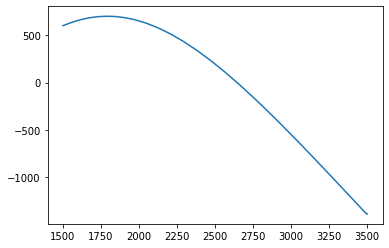

In [38]:
plt.plot(x,f2)

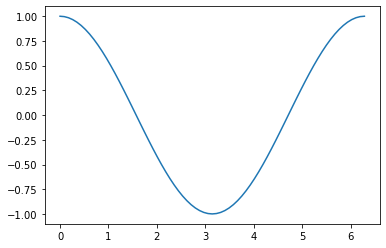

In [43]:
#3.a
f=lambda x: np.sin(x)
x=np.arange(0,365,5)*(np.pi/180)
dx=x[1]-x[0]
n=len(x)
slope=np.zeros(n)

for i in range(0,n):
  slope[i]=(f(x[i]+dx/2)-f(x[i]-dx/2))/dx

plt.plot(x,slope)

In [54]:
#3.b
def make_slope(dx):
# dx=np.pi/5
  x=np.arange(0,2*np.pi+dx,dx)
  n=len(x)
  slope=np.zeros(n)
  print(n)
  for i in range(0,n):
    slope[i]=(f(x[i]+dx/2)-f(x[i]-dx/2))/dx
  return x,slope

In [57]:
dx=np.pi/5
np.arange(0,2*np.pi+dx,dx)

array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
       3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678,
       6.28318531])

11
41


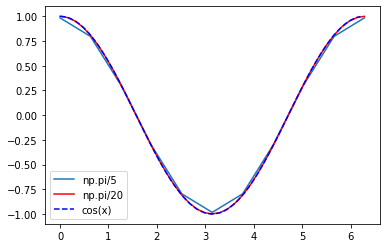

In [67]:
plt.plot(*make_slope(np.pi/5),label='np.pi/5')
plt.plot(*make_slope(np.pi/20),'r',label='np.pi/20')
plt.plot(np.arange(0,2*np.pi,0.1),np.cos(np.arange(0,2*np.pi,0.1)),'b--',label='cos(x)')
plt.legend()

In [ ]:
#dx가 작아질수록 실제 값과 유사해진다